In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Importing Libraries and data file**

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_excel("ecom customer_data.xlsx")
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


# **Data Preprocessing**

In [4]:
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [6]:
df.isna().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

# **Data Cleaning**

In [7]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [8]:
df.isna().sum()

Cust_ID                   0
Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft           

In [9]:
df.Gender.value_counts()

Gender
F    24778
M     5222
Name: count, dtype: int64

# **Exploratory Data Analysis**

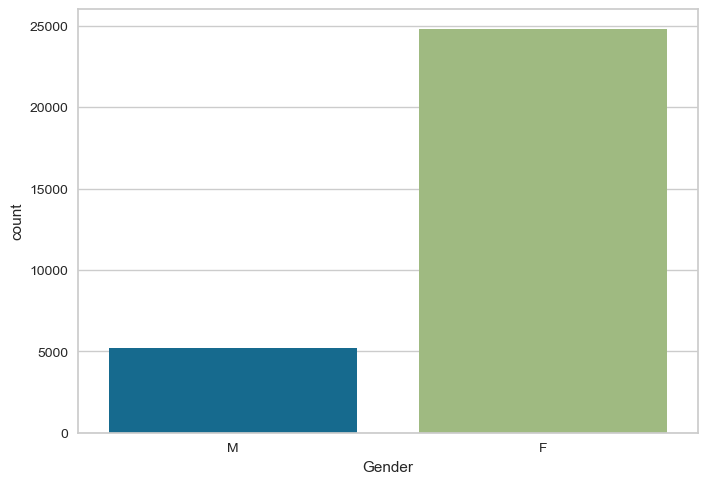

In [10]:
sns.countplot(data=df,x='Gender')
plt.show()

<Axes: xlabel='Orders', ylabel='count'>

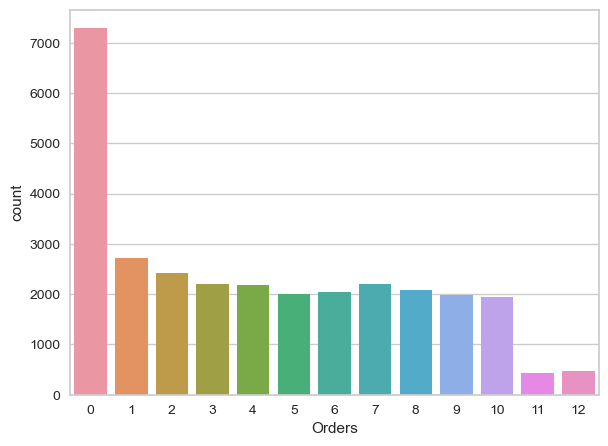

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=df,x='Orders')


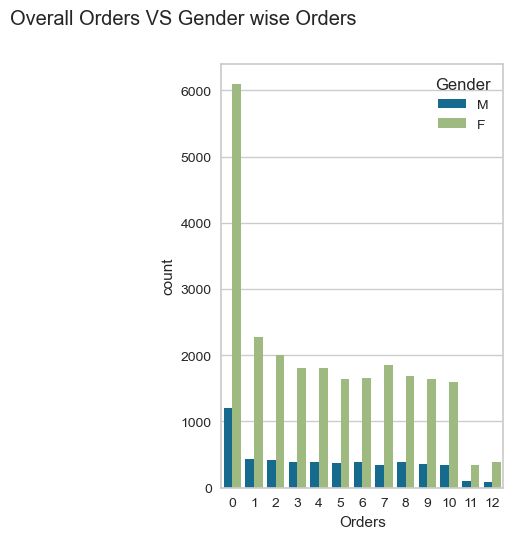

In [12]:
#Order count by each number
plt.subplot(1,2,2)
sns.countplot(data=df,x='Orders',hue='Gender')
plt.suptitle("Overall Orders VS Gender wise Orders")
plt.show()


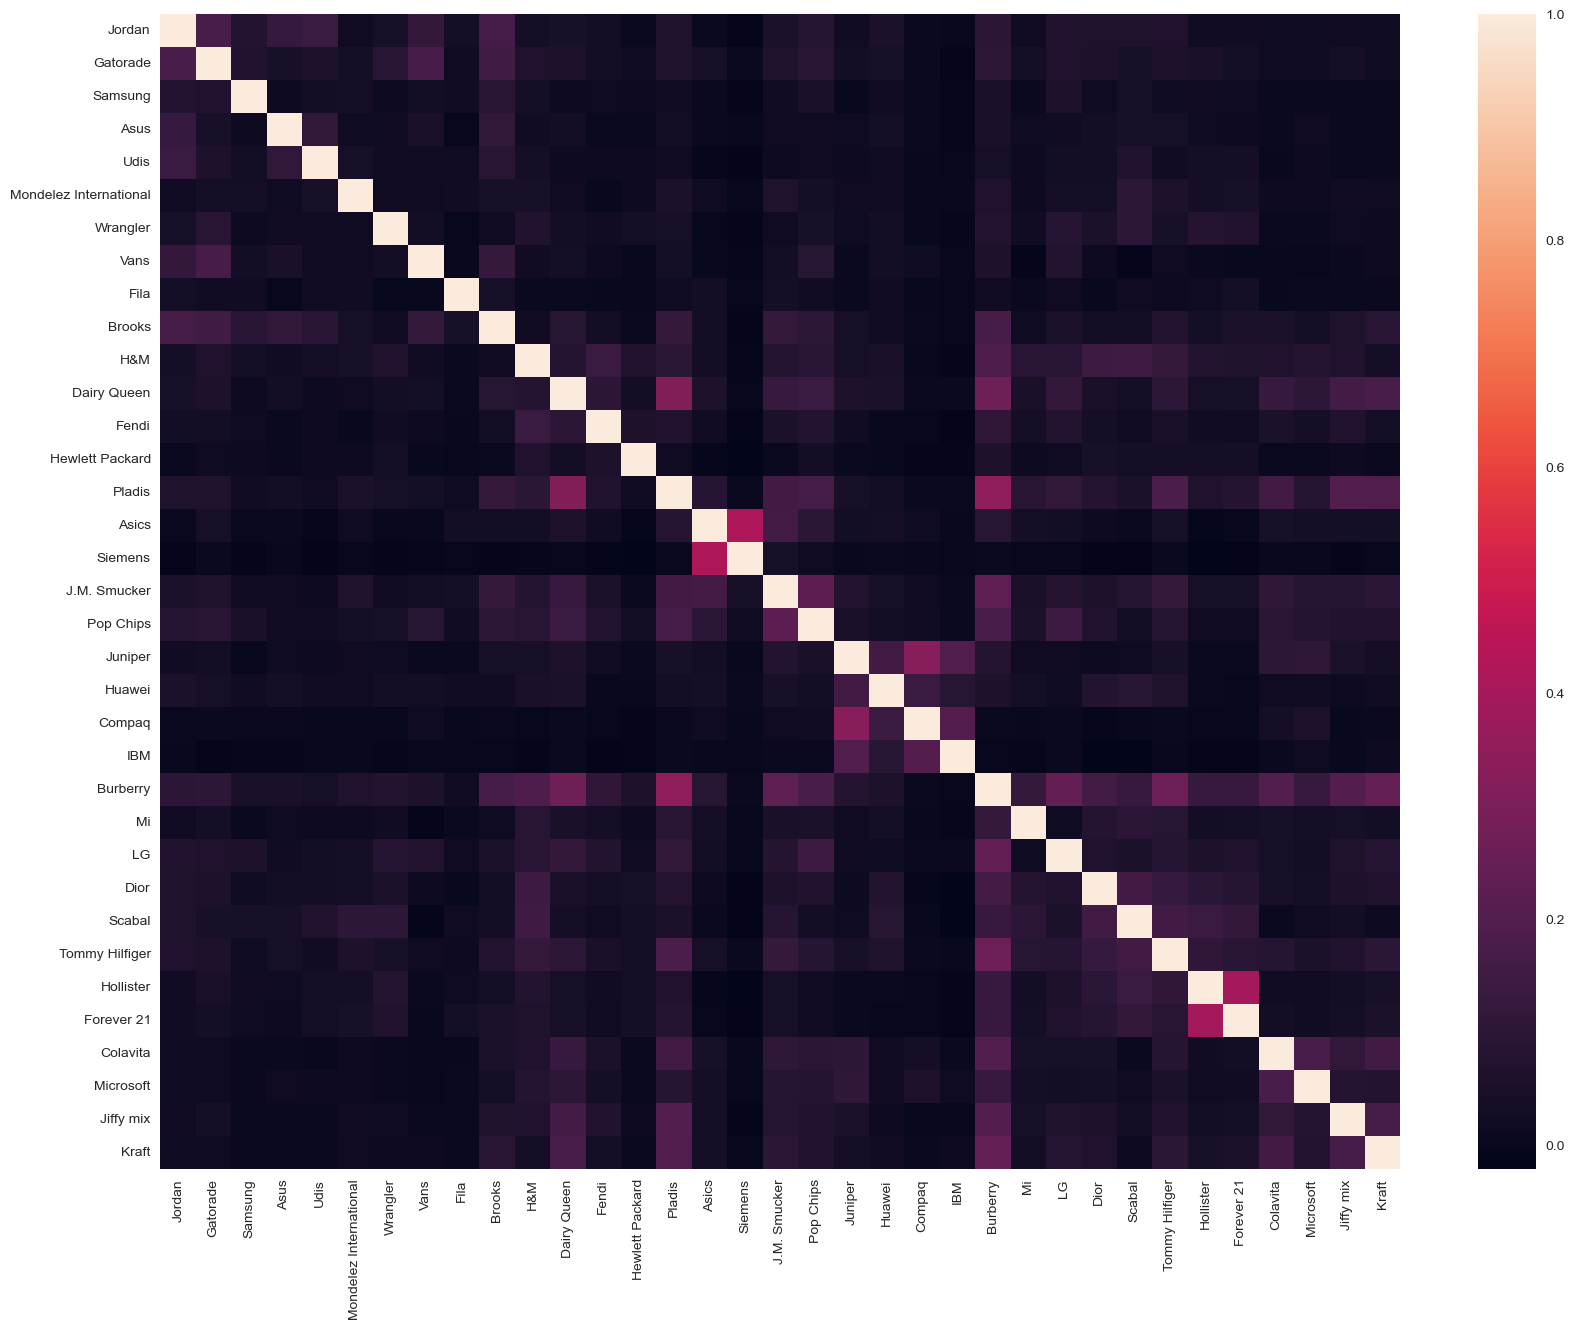

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(df.iloc[:,3:].corr())
plt.show()

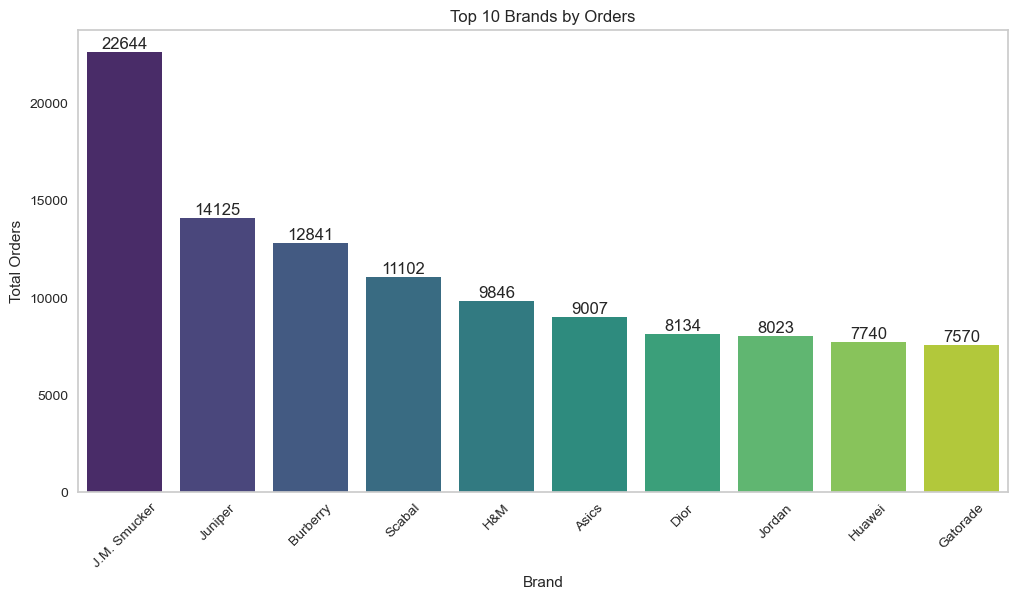

In [14]:
brands = ['Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis', 'Mondelez International', 'Wrangler', 
          'Vans', 'Fila', 'Brooks', 'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 
          'Asics', 'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM', 
          'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister', 'Forever 21', 
          'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft']


# Calculate the total orders for each brand
brand_orders = df[brands].sum().sort_values(ascending=False)

# Identify the top 10 brands based on total orders
top_10_brands = brand_orders.head(10)

# Plot the top 10 brands based on orders
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_brands.index, y=top_10_brands.values, palette='viridis')
for index, value in enumerate(top_10_brands.values):
    plt.text(index, value, f'{value}', ha='center', va='bottom')
plt.title('Top 10 Brands by Orders')
plt.xlabel('Brand')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [15]:
new_df=df.copy()
new_df['Total Search']=new_df.iloc[:,3:].sum(axis=1)

In [16]:
new_df.sort_values('Total Search', ascending=False)

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
9911,9912,F,2,0,11,0,0,0,0,6,...,2,8,4,9,1,4,1,3,6,160
24365,24366,F,2,3,3,2,2,0,1,2,...,2,2,6,4,1,4,3,3,2,136
4129,4130,F,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,127
888,889,F,0,2,1,3,2,0,1,3,...,3,1,5,3,2,5,1,3,4,109
15015,15016,F,10,2,2,2,0,0,0,0,...,0,1,0,0,1,7,4,2,2,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15000,15001,F,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
7247,7248,F,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7255,7256,M,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7259,7260,F,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
new_df.head()
pd.set_option('display.max_columns', None)

In [18]:
new_df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
0,1,M,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,2,F,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,18
2,3,M,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5
3,4,F,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,5,F,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,16


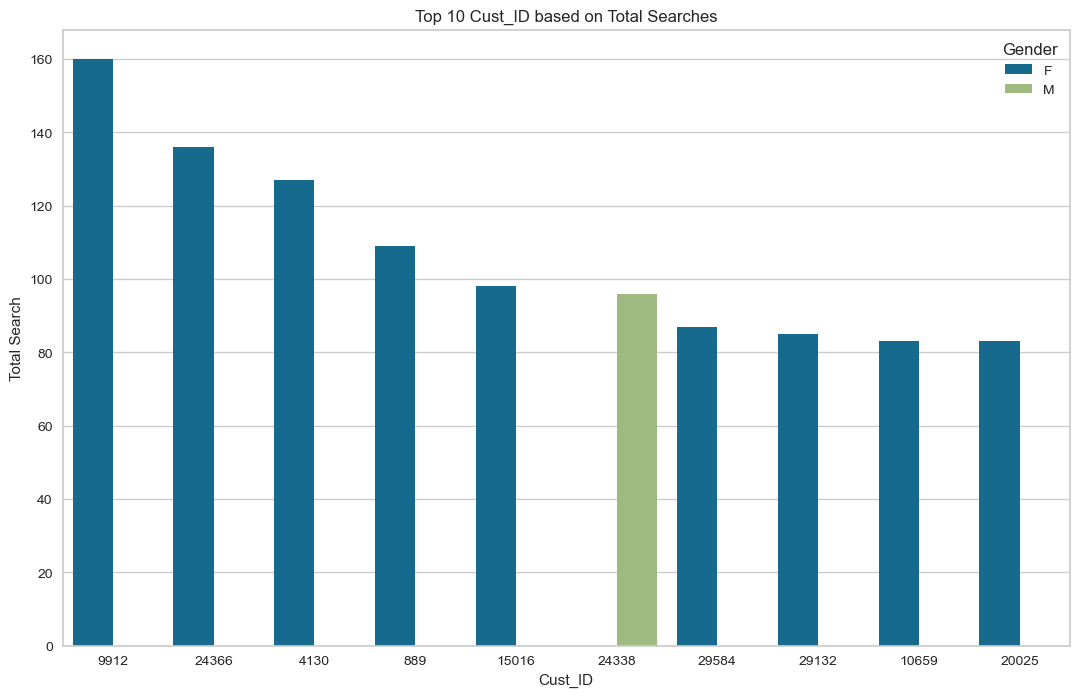

In [19]:
plt.figure(figsize=(13,8))
plt_data=new_df.sort_values('Total Search',ascending=False)[['Cust_ID','Gender','Total Search']].head(10)
sns.barplot(data=plt_data,
            x='Cust_ID',
            y='Total Search',
            hue='Gender',
            order=plt_data.sort_values('Total Search',ascending=False).Cust_ID)
plt.title("Top 10 Cust_ID based on Total Searches")
plt.show()


In [20]:
x=df.iloc[:,2:].values
x

array([[7, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [7, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [3, 2, 0, ..., 0, 0, 0]], dtype=int64)

# **Applying K-means Clustering algorithm**

In [21]:
scale=MinMaxScaler()
features=scale.fit_transform(x)
features

array([[0.58333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.58333333, 0.        , 0.06666667, ..., 0.07142857, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.08333333, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [22]:
inertia=[]
for i in range(1,16):
  k_means=KMeans(n_clusters=i)
  k_means=k_means.fit(features)
  inertia.append(k_means.inertia_)

(Text(0.5, 0, 'No of clusters'), Text(0, 0.5, 'Inertia'))

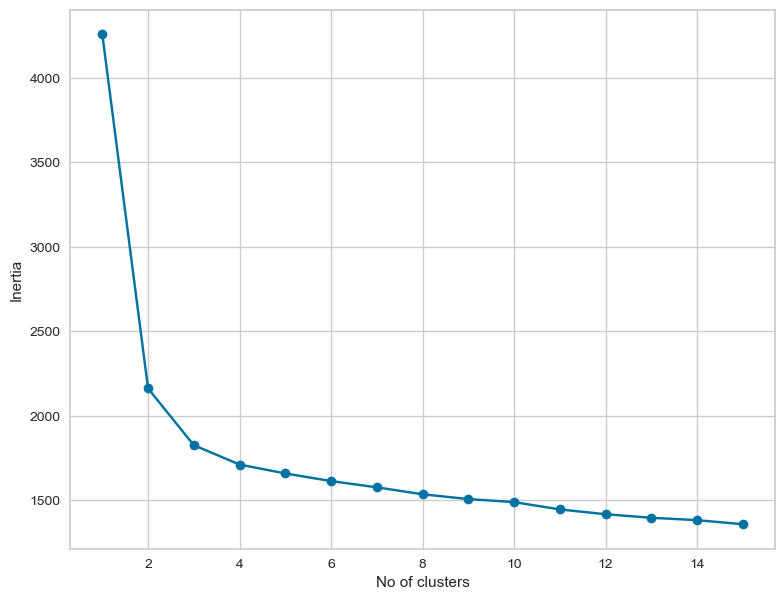

In [23]:
#Elbow graph
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(range(1,16),inertia, 'bo-')
plt.xlabel('No of clusters'),plt.ylabel('Inertia')

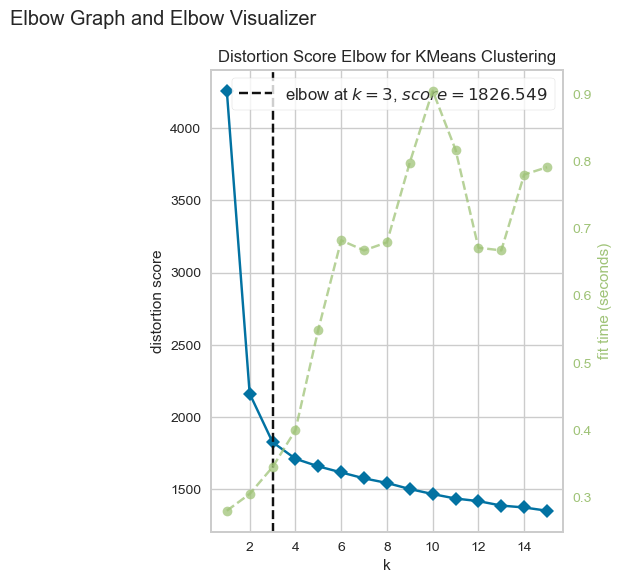

In [24]:
#Kelbow visualizer
plt.figure(figsize=(10,6))
plt.subplot(1,2,2)
kmeans=KMeans()
visualize=KElbowVisualizer(kmeans,k=(1,16))
visualize.fit(features)
plt.suptitle("Elbow Graph and Elbow Visualizer")
visualize.poof()
plt.show()

In [25]:
silhouette_avg=[]
for i in range(2,16):
  #initialize kmeans cluster
  kmeans=KMeans(n_clusters=i)
  cluster_labels=kmeans.fit_predict(features)
  #Silhouette score
  silhouette_avg.append(silhouette_score(features,cluster_labels))

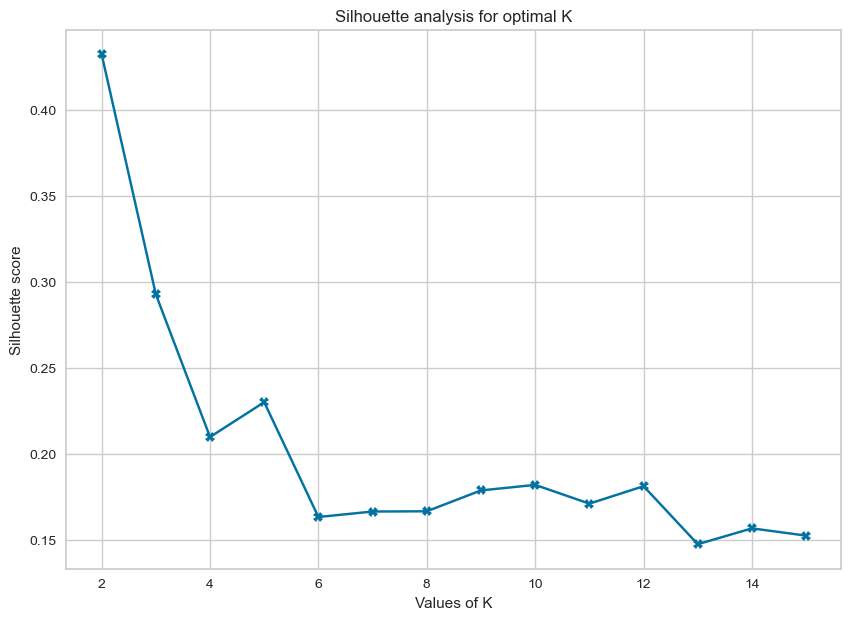

In [26]:
plt.figure(figsize=(10,7))
plt.plot(range(2,16),silhouette_avg, 'bX-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis for optimal K')
plt.show()

In [27]:
model=KMeans(n_clusters=3)
model=model.fit(features)

In [28]:
y_km=model.predict(features)
centers=model.cluster_centers_

In [29]:
df['Cluster']=pd.DataFrame(y_km)
df.to_csv("Cluster_data", index=False)

In [30]:
df["Cluster"].value_counts()

Cluster
2    12432
1     9128
0     8440
Name: count, dtype: int64

# **Clusters Segements Profiling**

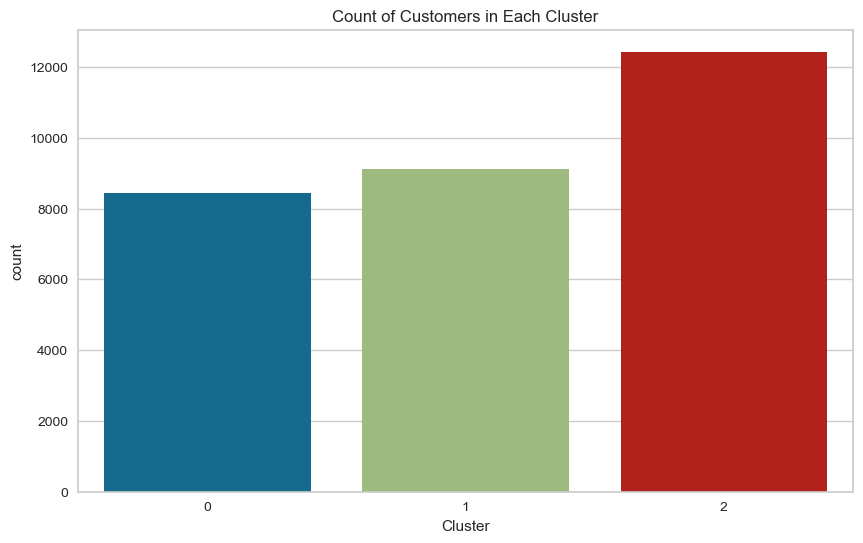

In [31]:
# Visualizing clusters
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cluster')
plt.title('Count of Customers in Each Cluster')
plt.show()

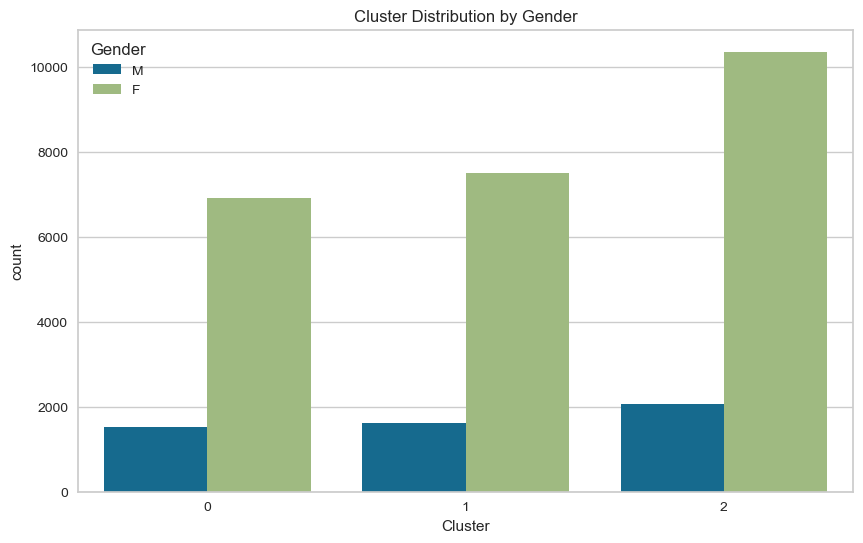

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cluster', hue='Gender')
plt.title('Cluster Distribution by Gender')
plt.show()

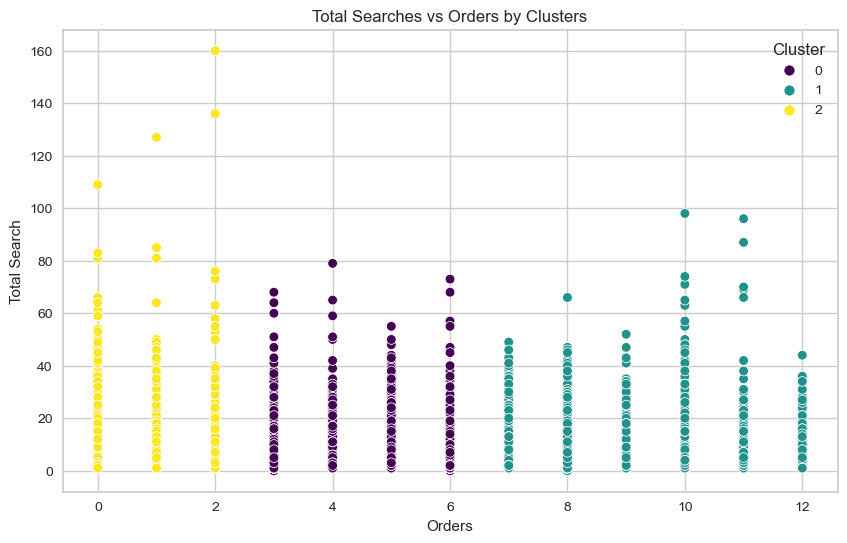

In [33]:
new_df['Cluster'] = df['Cluster']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_df, x='Orders', y='Total Search', hue='Cluster', palette='viridis')
plt.title('Total Searches vs Orders by Clusters')
plt.xlabel('Orders')
plt.ylabel('Total Search')
plt.show()

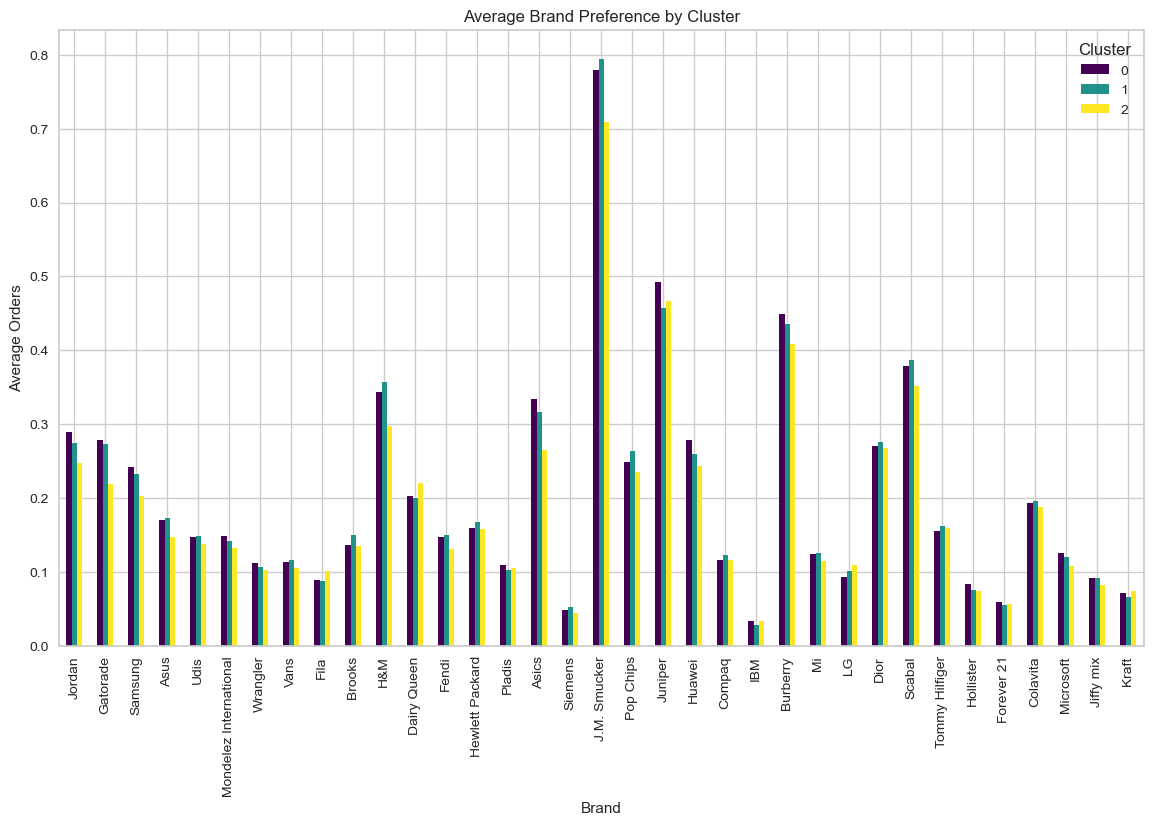

In [34]:
brand_cluster = df.groupby('Cluster')[brands].mean()
brand_cluster.T.plot(kind='bar', figsize=(14, 8), colormap='viridis')
plt.title('Average Brand Preference by Cluster')
plt.ylabel('Average Orders')
plt.xlabel('Brand')
plt.xticks(rotation=90)
plt.show()

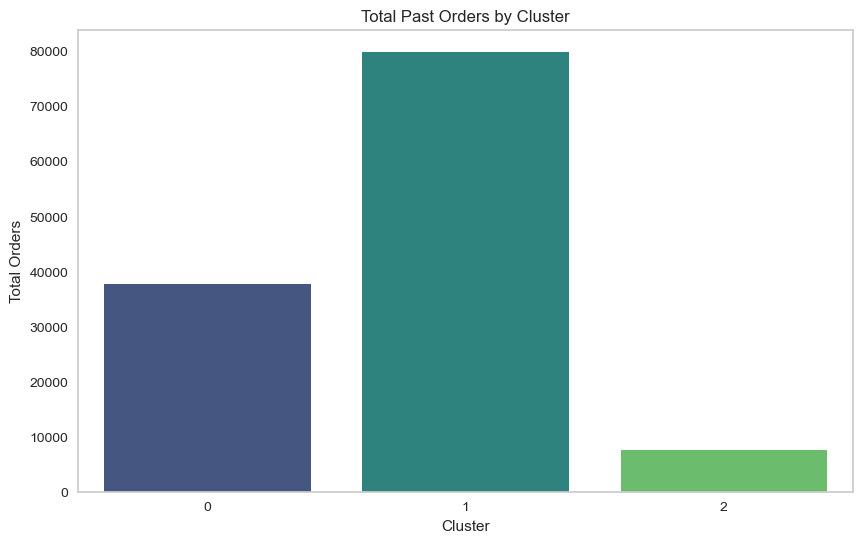

In [38]:
cluster_orders = df.groupby('Cluster')['Orders'].sum().sort_values(ascending=False)
# Plot the total past orders by cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_orders.index, y=cluster_orders.values, palette='viridis')
plt.title('Total Past Orders by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Orders')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# **Insights**

•	The customer base predominantly consists of females, indicating a need to tailor marketing strategies towards female preferences and behaviors.

•	A significant portion of customers have zero orders, suggesting potential issues in conversion or engagement that need to be addressed.

•	Orders from 1 to 10 show consistent levels, indicating stable repeat purchases among active customers and highlighting opportunities for customer retention strategies.

•	J.M. Smucker, Juniper, and Burberry are the top three brands based on order volume, suggesting strong brand recognition and customer preference.

•	The 'Total Search' column reflects brands with high customer interest, providing insights for targeted promotional strategies to convert interest into purchases.

•	K-means clustering identified three distinct customer segments, with Cluster 2 showing prominent engagement. Understanding these segments can optimize marketing efforts and product offerings.

•	Cluster 1 exhibits the highest total orders among the clusters, emphasizing the importance of personalized strategies to retain and maximize revenue from these high-value customers.


# **Conclusion**

•	Consistent order levels indicate good customer retention among active buyers, but the high zero-order count points to potential conversion issues.

•	Certain brands like J.M. Smucker, Juniper, and Burberry are highly popular, and leveraging these brands can enhance marketing effectiveness.

•	Understanding and converting high search interest into actual orders can be a growth strategy.

•	The clustering analysis revealed three distinct customer segments with varying behaviors and preferences, which can be targeted with tailored strategies.

•	Cluster 1, being the most active segment, should be the focus of retention and upselling efforts.


In [39]:
import nbformat
from nbconvert import HTMLExporter

# Load the notebook file
with open('E-com customer segementation.ipynb') as f:
    notebook_content = f.read()

# Parse the notebook content
notebook = nbformat.reads(notebook_content, as_version=4)

# Convert to HTML
html_exporter = HTMLExporter()
html_data, resources = html_exporter.from_notebook_node(notebook)

# Write to an HTML file
with open('E-com Customer Segementation Analysis.html', 'w') as f:
    f.write(html_data)